<a href="https://colab.research.google.com/github/maviverosp/PUC-Rio/blob/main/Sistemas_de_control_difusos_(L%C3%B3gica_Fuzzy)_el_problema_de_la_propina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistemas de control difusos: el problema de la propina.
---




El problema de la propina es comunmente usado para ilutrar el poder de los principios de la logica difusa para generar comportamiento complejo a partir de un conjunto compacto e intuitivo de reglas especializadas.
Se usted es nuevo en el mundo de los sistemas de control fuzzy, puede dar una vistazo en Fuzzy Control Primer antes de lee este ejemplo práctico.


**El problema de la propina**: Vamos a crear un sistema de control difuso que modela como usted escoge dar una propina en un restaurante. En la hora de la propina usted lleva en cosideranción el atendimiento y la calidad de la comida, califica entre 0 y 10. Usted usa una rango de propina entre el 0 y el 25%.

Fiomrulamos este problema como:

**Antecedentes (inputs)**
*   Servicio
1.  Universo (rango de valor tipo crisp): ¿Cuán bueno fue el antendimiento del equipo de garzones, en una escala de 0 a 10?
2.  Conjunto Fuzzy (rango de valor tipo fuzzy): pobre, aceptable , incleíble.

*   Calidad de la comida
1.  Universo (rango de valor tipo crisp): ¿Cuán buen sabor tiene la comida, en una escala de 0 a 10?
2.  Conjunto Fuzzy (rango de valor tipo fuzzy): malo, decente, bueno.

**Consecuencias (outputs)**
*   tip
1.  Universo (rango de valor tipo crisp): ¿Cánto debería ser la propina, en una escala de 0 a 25%?
2.  Conjunto Fuzzy (rango de valor tipo fuzzy): bajo, medio, alto.

*   Reglas
1.  SI el servicio fue bueno o la calidad de la comida fue buena, ENTONCES la propina será alta.
2.  Si el servicio fue mediocre, la propina será media.
3.  SI el servicio fue malo y la calidad de la comida fue mala, ENTONCES la propina será baja.
*   Utilización
1.  Si le digo a este controlador que he calificado el servicio como 9,8, y la calidad como 6,5,
2.  me recomendaría dejar un 20,2% de propina.


In [2]:
#Imstalar el API del sistema de control skfuzzy para modelar.
!pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=7a6452e96b887915b0d07caa991e0fc55ee93a3168215746ad705facb1a050a6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Los nuevos objetos Antecedent/Consequent contienen variables del universo y funciones de pertenencia
# Funciones
quality = ctrl.Antecedent(np.arange(0,11,1), "quality")
service = ctrl.Antecedent(np.arange(0,11,1), "service")
tip = ctrl.Consequent(np.arange(0,26,1),"tip")

#Auto memberchip funtion population i sposible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

tip["low"] = fuzz.trimf(tip.universe, [0,0,13])
tip["medium"] = fuzz.trimf(tip.universe, [0,13,25])
tip["high"] = fuzz.trimf(tip.universe, [13,25,25])


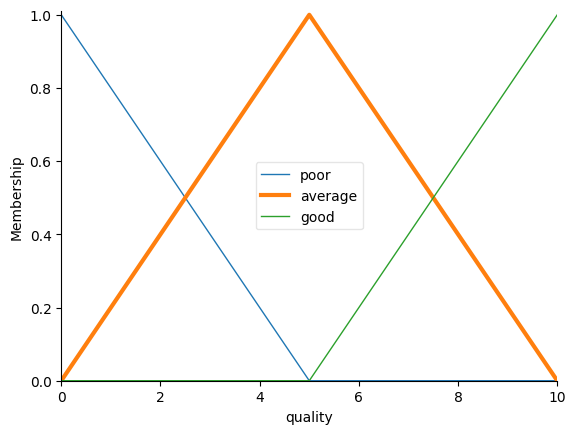

In [4]:
#Entender la imagen de la asociación **quality**.
quality["average"].view()

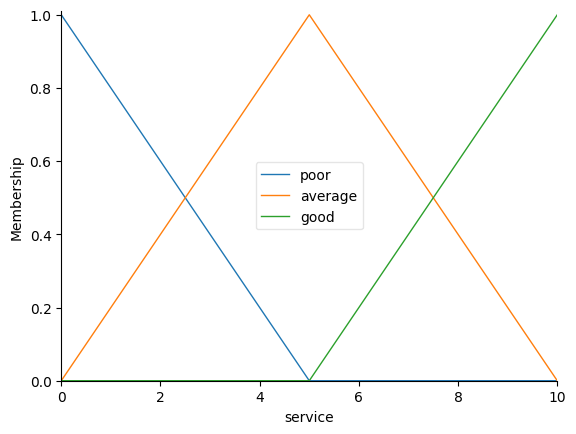

In [5]:
#Entender la imagen de la asociación **service**.
service.view()

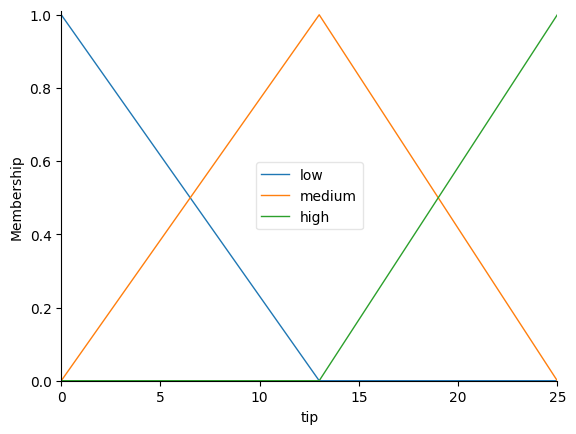

In [7]:
#Entender la imagen de la asociación **tip**.
tip.view()

**Reglas difusas**

Ahora, para que estos triángulos sean útiles, definimos la relación difusa entre las variables de entrada y de salida. Para los fines de nuestro ejemplo, consideremos tres reglas simples:

1.  Si la comida es mala O el servicio es malo, la propina será baja.
2.  Si el servicio es medio, la propina será media
3.  Si la comida es buena O el servicio es bueno, la propina será alta.

La mayoría de la gente estaría de acuerdo con estas reglas, pero son confusas. Convertir las reglas imprecisas en una propina definida y procesable es todo un reto. Este es el tipo de tarea en el que destaca la lógica difusa.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

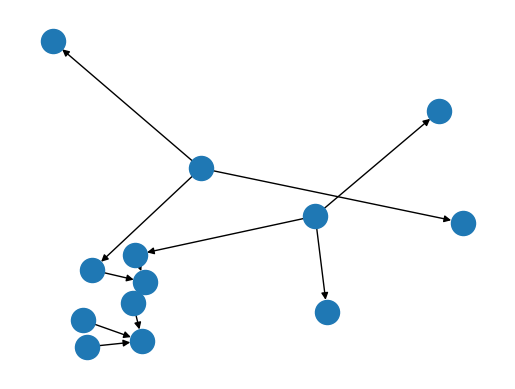

In [13]:
rule1 = ctrl.Rule(quality["poor"] | service["poor"], tip["low"])
rule2 = ctrl.Rule(quality["average"], tip["medium"])
rule3 = ctrl.Rule(quality["good"] | service["good"], tip["high"])

rule3.view()

##Creación y simulación del sistema de control

In [17]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])

Para simular este sistema de control, crearemos un ControlSystemSimulation. Piensa que este objeto representa nuestro controlador aplicado a un conjunto específico de circunstancias. Para una propina, esto podría ser dar propina a Sharon en el pub local. Crearíamos otro ControlSystemSimulation cuando intentáramos aplicar nuestro tipping_ctrl a Travis en la cafetería porque las entradas serían diferentes.


In [19]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al método de cálculo. Supongamos que calificamos la calidad con un 6,5 sobre 10 y el servicio con un 9,8 sobre 10.

In [23]:
# Pasar inputs al ControlSystem usando etiquetas Antecedent con Pythonic API
# Nota: si quieres pasar muchas entradas a la vez, usa .inputs(dict_of_data)

tipping.input["quality"] = 6.5
tipping.input["service"] = 9.8

#Calcular los numeros
tipping.compute()

Una vez calculado, podemos ver el resultado y visualizarlo.

14.79822137450634


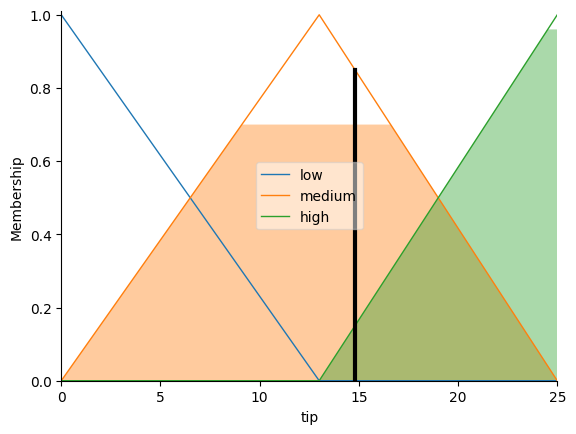

In [24]:
print (tipping.output['tip'])
tip.view(sim=tipping)

La propina sugerida es 14.79%